Saving adult.csv to adult.csv


/tmp/ipython-input-1150593613.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='income', y='hours-per-week', ax=axes[1, 0], palette={'<=50K': 'lightblue', '>50K': 'gold'})


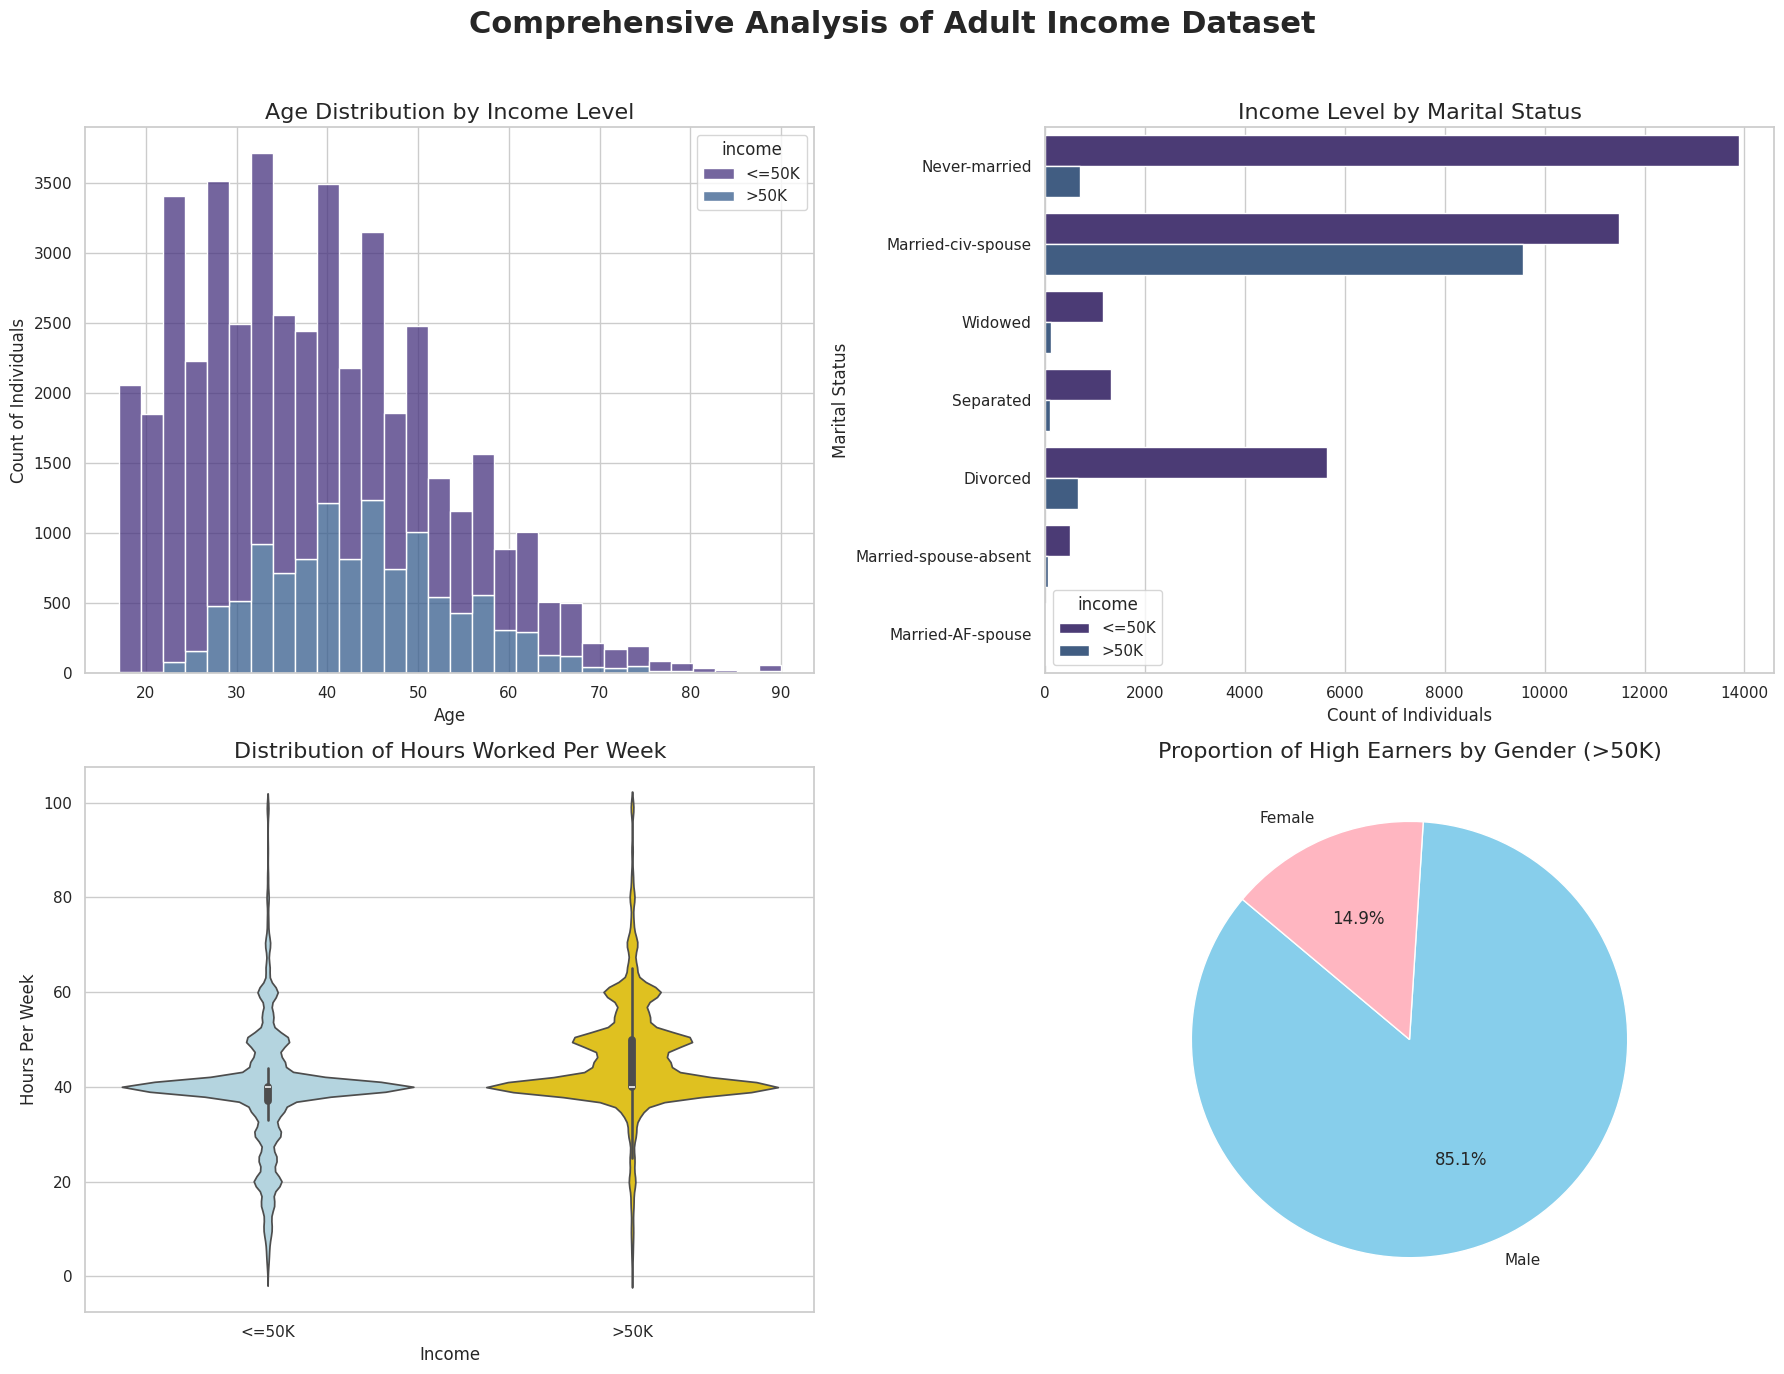

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('adult.csv')

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Set a consistent and professional style for the plots
sns.set_theme(style="whitegrid", palette="viridis")

# --- Create a figure with multiple subplots ---
# This creates a 2x2 grid of plots for a dashboard-like view.
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Comprehensive Analysis of Adult Income Dataset', fontsize=22, weight='bold')


# --- Plot 1: Age Distribution by Income (Histogram) ---
sns.histplot(data=df, x='age', hue='income', multiple='stack', ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Age Distribution by Income Level', fontsize=16)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count of Individuals')


# --- Plot 2: Income by Marital Status (Count Plot) ---
sns.countplot(data=df, y='marital-status', hue='income', ax=axes[0, 1])
axes[0, 1].set_title('Income Level by Marital Status', fontsize=16)
axes[0, 1].set_xlabel('Count of Individuals')
axes[0, 1].set_ylabel('Marital Status')


# --- Plot 3: Hours Per Week by Income (Violin Plot) ---
sns.violinplot(data=df, x='income', y='hours-per-week', ax=axes[1, 0], palette={'<=50K': 'lightblue', '>50K': 'gold'})
axes[1, 0].set_title('Distribution of Hours Worked Per Week', fontsize=16)
axes[1, 0].set_xlabel('Income')
axes[1, 0].set_ylabel('Hours Per Week')


# --- Plot 4: High Earners by Gender (Pie Chart) ---
# Filter for individuals earning >50K and count by gender
high_earners = df[df['income'] == '>50K']['gender'].value_counts()

axes[1, 1].pie(high_earners, labels=high_earners.index, autopct='%1.1f%%',
               startangle=140, colors=['skyblue', 'lightpink'])
axes[1, 1].set_title('Proportion of High Earners by Gender (>50K)', fontsize=16)
axes[1, 1].set_ylabel('') # Hide the y-label for pie chart


# --- Final Touches ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for the suptitle
plt.show()